# **Entrega 4 - Aprendizaje de máquinas**


In [103]:
#@markdown ----
#@markdown ### Importaciones Necesarias Para el Desarrollo
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
#@markdown ----

## **Ejercicio 1 - Wine Dataset (C = 2.0)**

In [ ]:
#@markdown ------
#@markdown #### **⚠️ Ingrese su número de CC**. ⬇

!gdown -qq "https://drive.google.com/uc?id=1lwtnHq8EJCeBvRSdwGj0U-9ELM7UKUBX" -O /eval_tools-1.1-py3-none-any.whl
!pip3 -qq install /eval_tools-1.1-py3-none-any.whl
!rm -r /eval_tools-1.1-py3-none-any.whl

import matplotlib.pyplot as plt
from eval_tools import load_wine_from_CC

CC = 1001812708 #@param {type:"number"}

train_wine, test_wine, train_labels, test_labels = load_wine_from_CC (CC)
print (train_wine.shape, test_wine.shape, train_labels.shape, test_labels.shape)

#@markdown ------

(142, 33) (36, 33) (142,) (36,)


In [ ]:
print (train_wine.shape, test_wine.shape, train_labels.shape, test_labels.shape)

(142, 33) (36, 33) (142,) (36,)


### **Clasificacion base (C = 0.5)**

Implemente un algoritmo de clasificación para la base de datos. Entrene utilizando los datos de entrenamiento ``train_wine`` y valide sobre los datos de prueba ``test_wine``. Calcule y muestre el accuracy y la matriz de confusión para el conjunto de datos de prueba. Tenga en cuenta que este clasificador con sus parámetros exactos deberá usarlos para los ejemplos posteriores,y estas dos métricas serán la referencia para comparar el desempeño con los ejercicios que realizará más adelante.


In [ ]:
clf = SVC(kernel='linear')

start_time = time.time()
clf.fit(train_wine, train_labels)
end_time = time.time()

print(f'Tiempo de entrenamiento: {end_time - start_time}')

Tiempo de entrenamiento: 0.06969070434570312


In [ ]:
predictions = clf.predict(test_wine)
acc = accuracy_score(test_labels, predictions)
cm = confusion_matrix(test_labels, predictions)

Accuracy: 0.42


<Axes: >

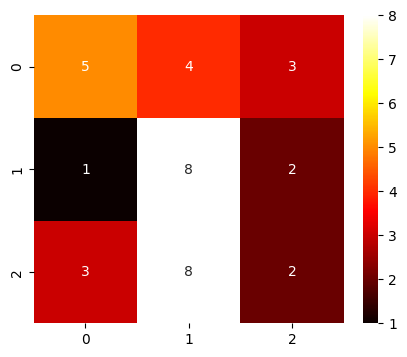

In [ ]:
_, ax = plt.subplots(figsize=(5,4))

print(f'Accuracy: {round(acc, 2)}')
sns.heatmap(cm, annot=True, cmap='hot', ax=ax)

### **Análisis con PCA (C = 0.8)**

1. Implemente el algoritmo de PCA para reducir el numero de características iniciales, de tal forma en que pueda obtener el mayor desempeño usando la menor cantidad de características posible con el clasificador anterior.
2. Muestre un diagrama de dispersión de las muestras del subconjunto de test y sus respectivas fronteras de decisión después de usar PCA.
3. Compare el accuracy y la matriz de confusión sobre el conjunto de test con el desempeño del clasificador base. Justifique el número de componentes elegido en base a las métricas base calculadas anteriormente

In [ ]:
pca = PCA(n_components = 5, random_state=1 )

trans_train = pca.fit_transform(train_wine)
trans_test = pca.transform(test_wine)

In [ ]:
print(trans_train.shape, trans_test.shape)
print(pca.explained_variance_ratio_)

(142, 5) (36, 5)
[0.14378995 0.08731674 0.05810633 0.0504324  0.04993663]


(Text(0.5, 0, 'PCA-1'), Text(0, 0.5, 'PCA-2'))

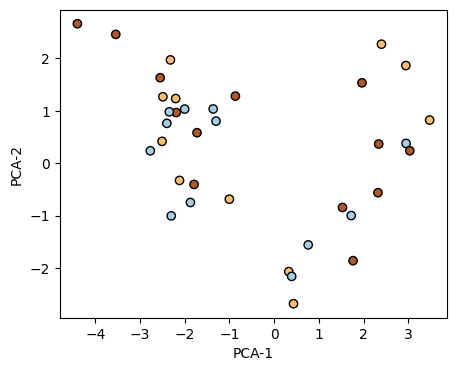

In [ ]:
_, ax = plt.subplots(figsize=(5,4))

ax.scatter(trans_test[:, 0], trans_test[:, 1], c=test_labels, cmap='Paired', edgecolors='k')
ax.set_xlabel('PCA-1'), ax.set_ylabel('PCA-2')

In [ ]:
start_time = time.time()
clf.fit(trans_train, train_labels)
end_time = time.time()

print(f'Tiempo de Entrenamiento: {end_time-start_time}')

Tiempo de Entrenamiento: 0.0042819976806640625


For PCA
Accuracy before: 0.417, - Now : 0.389 



(Text(0.5, 1.0, 'Before'), Text(0.5, 1.0, 'PCA'))

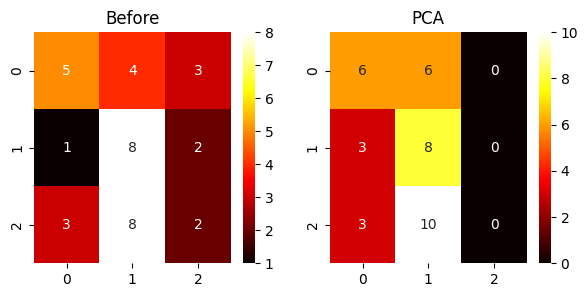

In [ ]:
predictions = clf.predict(trans_test)
acc_trans = accuracy_score(test_labels, predictions)
cm_trans = confusion_matrix(test_labels, predictions)

# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format(acc, acc_trans ))

_, axes = plt.subplots(1, 2, figsize=(7,3))

sns.heatmap(cm, annot=True, cmap='hot', ax=axes[0])
sns.heatmap(cm_trans, annot=True, cmap='hot', ax=axes[1])
axes[0].set_title('Before'), axes[1].set_title('PCA')

### **Análisis con Kernel PCA (C = 0.7)**

1. Implemente el algoritmo de kernel PCA para reducir el numero de características iniciales, de tal forma en que pueda obtener el mayor desempeño usando la menor cantidad de características posible con el clasificador anterior.
2. Muestre un diagrama de dispersión de las muestras del subconjunto de test y sus respectivas fronteras de decisión después de usar kernel PCA.
3. Compare el accuracy y la matriz de confusión sobre el conjunto de test con el desempeño del clasificador base y de PCA. Justifique el número de componentes elegido en base a las métricas base calculadas anteriormente


In [ ]:
kpca = KernelPCA(n_components = 5, kernel='poly', random_state=1 )

trans_train = kpca.fit_transform(train_wine)
trans_test = kpca.transform(test_wine)

In [ ]:
print(trans_train.shape, trans_test.shape)
print(kpca.eigenvalues_)

(142, 5) (36, 5)
[71.85926874 46.30629395 32.2023435  28.71461601 27.40996885]


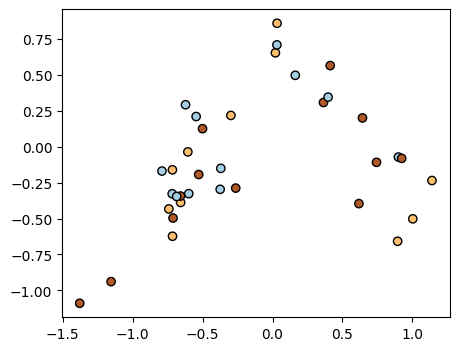

In [ ]:
_, ax = plt.subplots(figsize=(5,4))

ax.scatter(trans_test[:,0], trans_test[:, 1],c=test_labels, cmap='Paired', edgecolors='k')

In [ ]:
start_time = time.time()
clf.fit(trans_train, train_labels)
end_time = time.time()

print(f'Tiempo de Entrenamiento: {end_time-start_time}')

Tiempo de Entrenamiento: 0.004010915756225586


For Kernel PCA
Accuracy before: 0.417, - Now : 0.444 



(Text(0.5, 1.0, 'Before'), Text(0.5, 1.0, 'KPCA'))

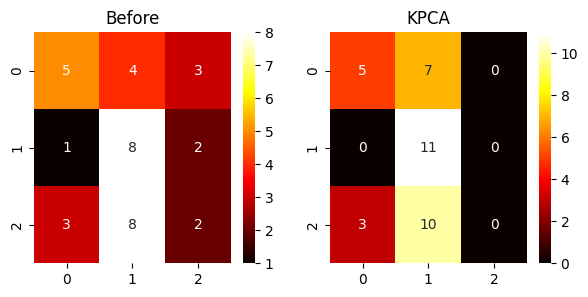

In [ ]:
#metricas
predictions = clf.predict(trans_test)
acc_trans = accuracy_score(test_labels, predictions)
cm_trans = confusion_matrix(test_labels, predictions)

# Comparacion
print("For Kernel PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( acc, acc_trans ))

_, axes = plt.subplots(1, 2, figsize=(7,3))

sns.heatmap(cm, annot=True, cmap='hot', ax=axes[0])
sns.heatmap(cm_trans, annot=True, cmap='hot', ax=axes[1])
axes[0].set_title('Before'), axes[1].set_title('KPCA')

## **Ejercicio 2 - House Prices Dataset (C = 3.0)**

In [ ]:
#@markdown ---------------
#@markdown ## **⚠️❗ Ejecute esta celda para descargar House Prices dataset❗⚠️**
#@markdown ### Esta celda creará la carpeta ```/content/house_prices_data```

!pip install -qq gdown
!gdown -qq "https://drive.google.com/uc?id=1p9sPqT8sQgg3oT0UEEXadkCbkAJCo_ij" -O /house_prices.zip
!mkdir /content/house_prices_data/
!unzip -qq /house_prices.zip -d /content/house_prices_data
!rm -r /house_prices.zip
#@markdown ---------------

In [ ]:
!ls house_prices_data/

test.csv  train.csv


### **Clasificacion base (C = 0.5)**

Implemente un algoritmo de clasificación para la base de datos. Utilice los datos contenidos en la carpeta ```house_prices_data/```. Calcule y muestre el accuracy y la matriz de confusión para el conjunto de datos de prueba. Tenga en cuenta que este clasificador con sus parámetros exactos deberá usarlos para los ejemplos posteriores,y estas dos métricas serán la referencia para comparar el desempeño con los ejercicios que realizará más adelante.

In [ ]:
data_train = pd.read_csv('/content/house_prices_data/train.csv')
data_test = pd.read_csv('/content/house_prices_data/test.csv')

In [ ]:
data_train.head()

,Id,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,1,7,5,2003,856,1710,2,2,208500
1,2,6,8,1976,1262,1262,2,2,181500
2,3,7,5,2001,920,1786,2,2,223500
3,4,7,5,1915,756,1717,1,3,140000
4,5,8,5,2000,1145,2198,2,3,250000


In [112]:
#Limpio campos pasando los NaN a 0
data_train = data_train.fillna(0)

#Fila que se usara para etiquetar
print(data_train['OverallQual'].value_counts())

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64


In [ ]:
data_test.head()

,Id,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SaleCondition
0,1461,5,6,1961,882.0,896,1,1.0,Normal
1,1462,6,6,1958,1329.0,1329,1,1.0,Normal
2,1463,5,5,1997,928.0,1629,2,2.0,Normal
3,1464,6,6,1998,926.0,1604,2,2.0,Normal
4,1465,8,5,1992,1280.0,1280,2,2.0,Normal


In [113]:
#Limpio campos pasando los NaN a 0
data_test = data_test.fillna(0)

#Fila que se usara para etiquetar
print(data_test['OverallQual'].value_counts())

OverallQual
5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: count, dtype: int64


In [114]:
X_train, Y_train = data_train.iloc[:, 2:8], data_train.iloc[:, 1]
X_test, Y_test = data_test.iloc[:, 2:8], data_test.iloc[:, 1]

print(f'X_train: {X_train.shape}, X_test: {X_test.shape}\nY_train: {Y_train.shape}, Y_test: {Y_test.shape}')

X_train: (1460, 6), X_test: (1459, 6)
Y_train: (1460,), Y_test: (1459,)


In [116]:
clf = SVC(kernel='poly')

start_time = time.time()
clf.fit(X_train, Y_train)
end_time = time.time()

print(f'Tiempo de entrenamiento: {end_time - start_time}')

Tiempo de entrenamiento: 0.1473069190979004


In [117]:
predictions = clf.predict(X_test)
acc = accuracy_score(Y_test, predictions)
cm = confusion_matrix(Y_test, predictions)

Accuracy: 0.42


<Axes: >

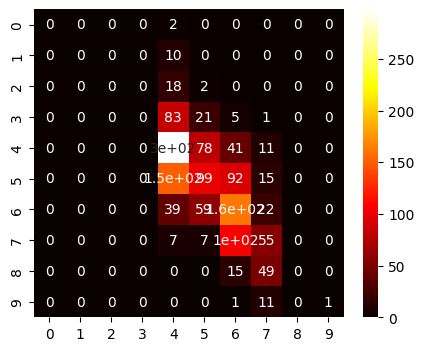

In [118]:
_, ax = plt.subplots(figsize=(5,4))

print(f'Accuracy: {round(acc, 2)}')
sns.heatmap(cm, annot=True, cmap='hot', ax=ax)

### **Análisis con PCA (C = 1.25)**

1. Implemente el algoritmo de PCA para reducir el numero de características iniciales, de tal forma en que pueda obtener el mayor desempeño usando la menor cantidad de características posible con el clasificador anterior.
2. Muestre un diagrama de dispersión de las muestras del subconjunto de test y sus respectivas fronteras de decisión después de usar PCA.
3. Compare el accuracy y la matriz de confusión sobre el conjunto de test con el desempeño del clasificador base. Justifique el número de componentes elegido en base a las métricas base calculadas anteriormente


In [142]:
pca = PCA(n_components = 3, random_state=1 )

trans_train = pca.fit_transform(X_train)
trans_test = pca.transform(X_test)

In [143]:
print(trans_train.shape, trans_test.shape)
print(pca.explained_variance_ratio_)

(1460, 3) (1459, 3)
[0.73967545 0.25867775 0.00164356]


(Text(0.5, 0, 'PCA-1'), Text(0, 0.5, 'PCA-2'))

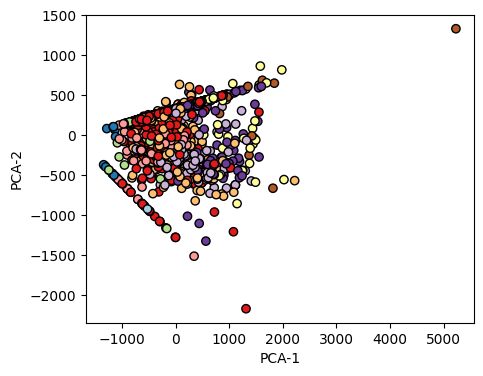

In [144]:
_, ax = plt.subplots(figsize=(5,4))

ax.scatter(trans_test[:, 0], trans_test[:, 1], c=Y_test, cmap='Paired', edgecolors='k')
ax.set_xlabel('PCA-1'), ax.set_ylabel('PCA-2')

In [145]:
start_time = time.time()
clf.fit(trans_train, Y_train)
end_time = time.time()

print(f'Tiempo de Entrenamiento: {end_time-start_time}')

Tiempo de Entrenamiento: 0.25677013397216797


For PCA
Accuracy before: 0.421, - Now : 0.373 



(Text(0.5, 1.0, 'Before'), Text(0.5, 1.0, 'PCA'))

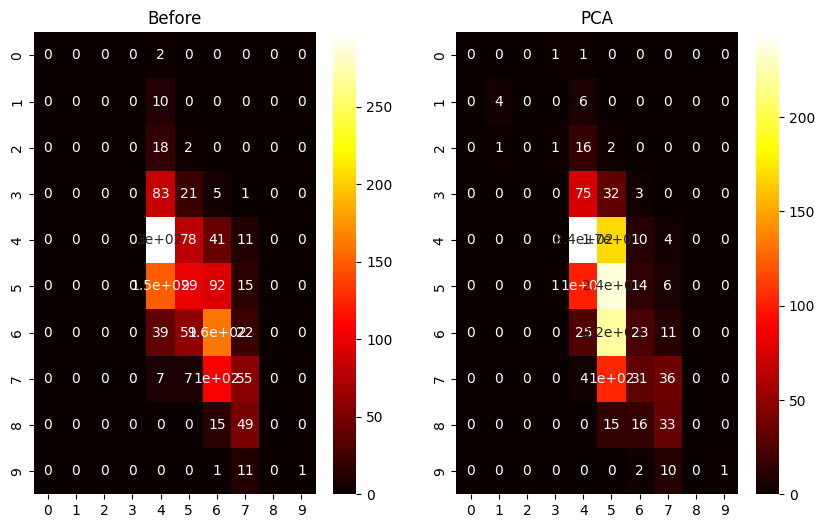

In [146]:
predictions = clf.predict(trans_test)
acc_trans = accuracy_score(Y_test, predictions)
cm_trans = confusion_matrix(Y_test, predictions)

# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format(acc, acc_trans ))

_, axes = plt.subplots(1, 2, figsize=(10,6))

sns.heatmap(cm, annot=True, cmap='hot', ax=axes[0])
sns.heatmap(cm_trans, annot=True, cmap='hot', ax=axes[1])
axes[0].set_title('Before'), axes[1].set_title('PCA')

### **Análisis con Kernel PCA (C = 1.25)**

1. Implemente el algoritmo de kernel PCA para reducir el numero de características iniciales, de tal forma en que pueda obtener el mayor desempeño usando la menor cantidad de características posible con el clasificador anterior.
2. Muestre un diagrama de dispersión de las muestras del subconjunto de test y sus respectivas fronteras de decisión después de usar kernel PCA.
3. Compare el accuracy y la matriz de confusión sobre el conjunto de test con el desempeño del clasificador base y de PCA. Justifique el número de componentes elegido en base a las métricas base calculadas anteriormente



In [148]:
kpca = KernelPCA(n_components = 3, kernel='poly', random_state=1 )

trans_train = kpca.fit_transform(X_train)
trans_test = kpca.transform(X_test)

In [149]:
print(trans_train.shape, trans_test.shape)
print(kpca.eigenvalues_)

(1460, 3) (1459, 3)
[2.77960681e+21 3.31477890e+20 1.04541884e+20]


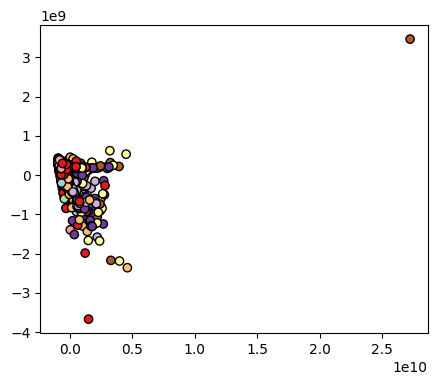

In [151]:
_, ax = plt.subplots(figsize=(5,4))

ax.scatter(trans_test[:,0], trans_test[:, 1],c=Y_test, cmap='Paired', edgecolors='k')

In [152]:
start_time = time.time()
clf.fit(trans_train, Y_train)
end_time = time.time()

print(f'Tiempo de Entrenamiento: {end_time-start_time}')

Tiempo de Entrenamiento: 0.12913131713867188


For Kernel PCA
Accuracy before: 0.421, - Now : 0.314 



(Text(0.5, 1.0, 'Before'), Text(0.5, 1.0, 'KPCA'))

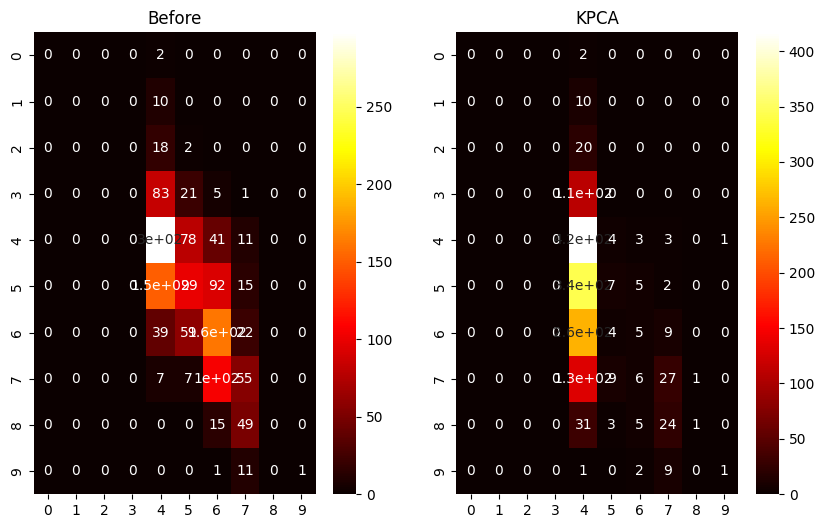

In [155]:
#metricas
predictions = clf.predict(trans_test)
acc_trans = accuracy_score(Y_test, predictions)
cm_trans = confusion_matrix(Y_test, predictions)

# Comparacion
print("For Kernel PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( acc, acc_trans ))

_, axes = plt.subplots(1, 2, figsize=(10,6))

sns.heatmap(cm, annot=True, cmap='hot', ax=axes[0])
sns.heatmap(cm_trans, annot=True, cmap='hot', ax=axes[1])
axes[0].set_title('Before'), axes[1].set_title('KPCA')